In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6791,FDI34,10.65,Regular,0.085483,Snack Foods,231.4668,OUT018,2009,Medium,Tier 3,Supermarket Type2,3225.1352
6103,DRG36,14.15,Low Fat,0.095299,Soft Drinks,171.8106,OUT013,1987,High,Tier 3,Supermarket Type1,3935.5438
4198,FDI34,10.65,Regular,0.085618,Snack Foods,229.3668,OUT017,2007,NaN,Tier 2,Supermarket Type1,2303.6680
4891,FDY14,10.30,Low Fat,0.070027,Dairy,263.6226,OUT035,2004,Small,Tier 2,Supermarket Type1,6608.0650
797,FDG44,6.13,Low Fat,0.102607,Fruits and Vegetables,54.0298,OUT018,2009,Medium,Tier 3,Supermarket Type2,808.9470
7804,DRM47,9.30,Low Fat,0.073288,Hard Drinks,189.1846,OUT010,1998,NaN,Tier 3,Grocery Store,382.1692
6067,FDE14,13.65,Regular,0.031494,Canned,98.8700,OUT049,1999,Medium,Tier 1,Supermarket Type1,2197.1400
427,FDN32,17.50,Low Fat,0.015624,Fruits and Vegetables,182.6266,OUT018,2009,Medium,Tier 3,Supermarket Type2,3135.2522
8017,FDL43,10.10,Low Fat,0.027064,Meat,76.3670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700
7457,FDH60,NaN,Regular,0.080346,Baking Goods,195.7110,OUT027,1985,Medium,Tier 3,Supermarket Type3,5499.5080


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [6]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [7]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
567,FDL25,6.920000,Regular,0.131128,Breakfast,93.1804,OUT049,1999,Medium,Tier 1,Supermarket Type1,1561.9668
3102,DRL35,15.700000,Low Fat,0.030751,Hard Drinks,42.5770,OUT049,1999,Medium,Tier 1,Supermarket Type1,952.0940
1497,FDB17,13.150000,Low Fat,0.036880,Frozen Foods,181.3976,OUT017,2007,Medium,Tier 2,Supermarket Type1,3078.6592
5327,FDG24,7.975000,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1,1331.6000
764,FDY03,17.600000,Regular,0.076122,Meat,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1,1125.2020
185,FDK58,11.350000,Regular,0.045166,Snack Foods,100.0016,OUT018,2009,Medium,Tier 3,Supermarket Type2,1012.0160
8158,NCB54,8.760000,Low Fat,0.050336,Health and Hygiene,126.2336,OUT017,2007,Medium,Tier 2,Supermarket Type1,1406.1696
2705,DRG23,8.880000,Low Fat,0.086916,Hard Drinks,153.3682,OUT049,1999,Medium,Tier 1,Supermarket Type1,1219.7456
4737,NCV54,11.100000,Low Fat,0.033176,Household,120.1124,OUT045,2002,Medium,Tier 2,Supermarket Type1,1896.1984
7351,FDV39,12.857645,Low Fat,0.000000,Meat,196.8426,OUT019,1985,Small,Tier 1,Grocery Store,593.2278


In [8]:
df.shape

(8523, 12)

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [15]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#here item visibility value is 0,its not sense..

In [18]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [19]:
df_visualisation=df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']].copy()
        

In [20]:
df_visualisation.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


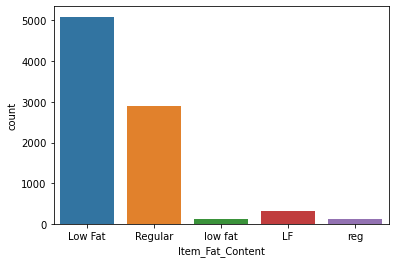

In [21]:
ax=sns.countplot(x="Item_Fat_Content",data=df_visualisation)
print(df_visualisation["Item_Fat_Content"].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


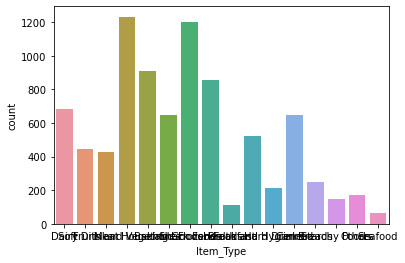

In [22]:
ax=sns.countplot(x="Item_Type",data=df_visualisation)
print(df_visualisation["Item_Type"].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


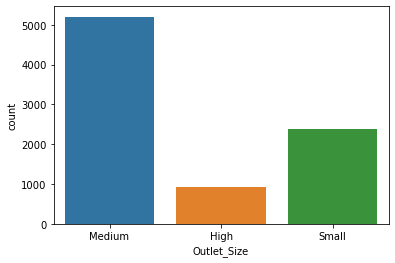

In [23]:
ax=sns.countplot(x="Outlet_Size",data=df_visualisation)
print(df_visualisation["Outlet_Size"].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


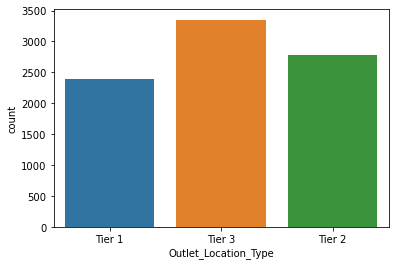

In [24]:
ax=sns.countplot(x="Outlet_Location_Type",data=df_visualisation)
print(df_visualisation["Outlet_Location_Type"].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


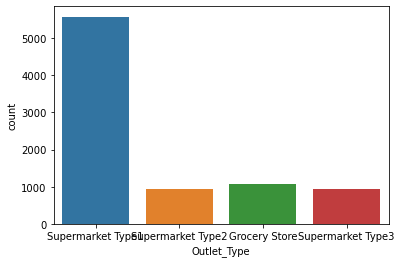

In [25]:
ax=sns.countplot(x="Outlet_Type",data=df_visualisation)
print(df_visualisation["Outlet_Type"].value_counts())

In [26]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

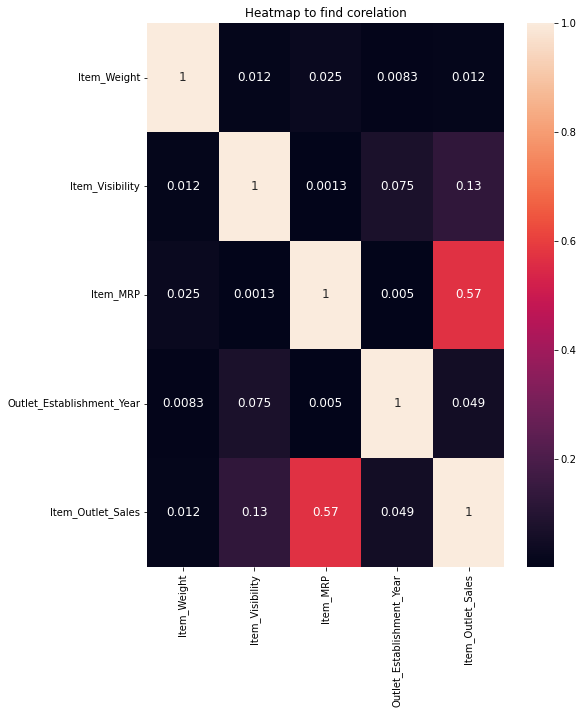

In [27]:
corr=df.corr().abs()
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show

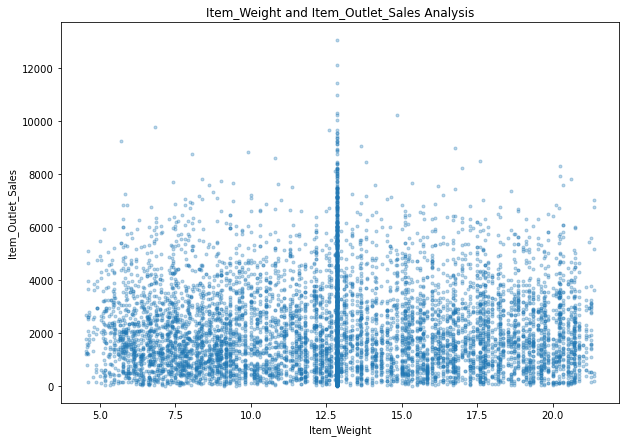

In [32]:
plt.figure(figsize=(10,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Weight, df["Item_Outlet_Sales"],'.', alpha = 0.3)

In [ ]:
#Item weight had low corelation..

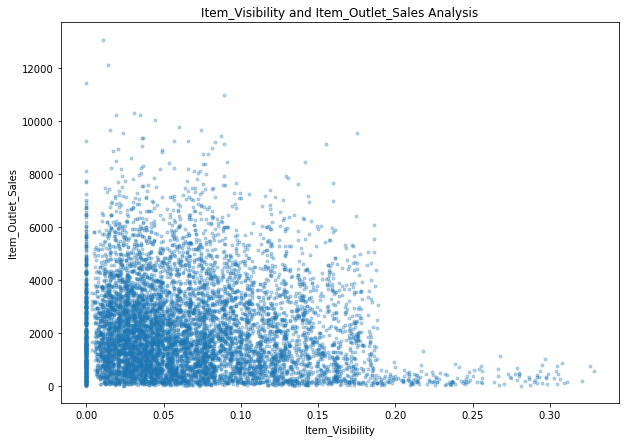

In [33]:
plt.figure(figsize=(10,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Visibility, df["Item_Outlet_Sales"],'.', alpha = 0.3)

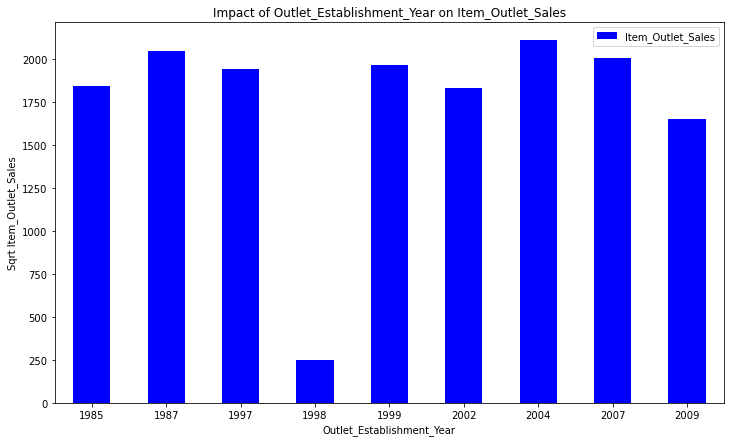

In [34]:
Outlet_Establishment_Year_pivot = df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#"outlet_Establismnt_year on outlet_sales"

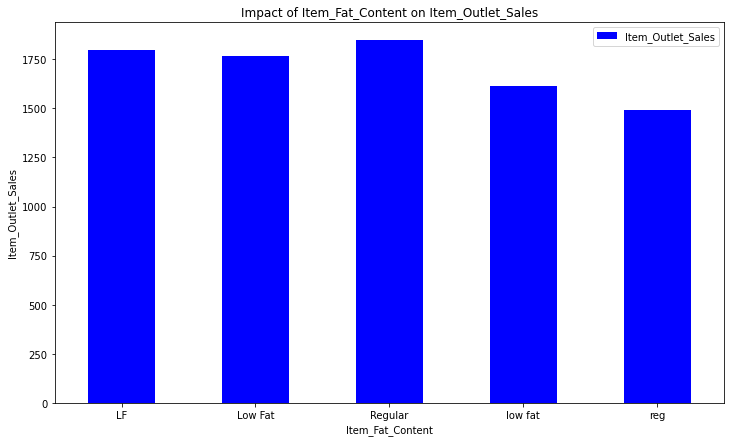

In [37]:
Item_Fat_Content_pivot = df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Item_fat_content on outlet_sales..

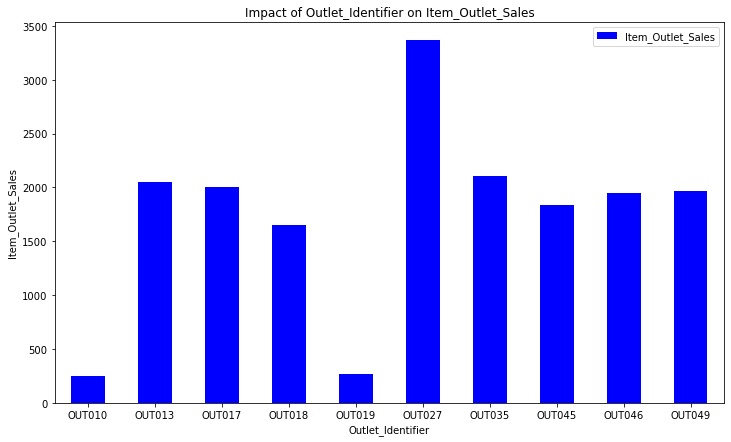

In [39]:
Outlet_Identifier_pivot = df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [40]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [41]:
data = pd.concat([df,test], ignore_index = True)
print(df.shape, test.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [42]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [44]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12              11.600000
DRA24              18.051529
DRA59               9.187529
DRB01               8.171092
DRB13               6.115000
...                      ...
NCZ30               7.286405
NCZ41              19.850000
NCZ42              10.500000
NCZ53               9.961961
NCZ54              14.291529

[1559 rows x 1 columns]


In [45]:
def impute_weight(cols):
  Weight = cols[0]
  Identifier = cols[1]

  if pd.isnull(Weight):
    return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]

  else:
    return Weight

print('Original #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Original #missing: 976
Final #missing: 0


In [46]:
from scipy.stats import mode

In [47]:
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Medium,Medium,Medium


In [48]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]

    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size']      [outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))

data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)

print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 1606
Final #missing: 0


In [49]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
